<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_YB_week6_1_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 03 앙상블 학습

**앙상블 학습 개요**

앙상블 학습(Esemble Learning): 여러 개의 분류기(Clssifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

- 보팅(Voting): 서로 다른 알고리즘을 가진 분류기를 결합
- 배깅(Bagging): 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행
- 부스팅(Boosting)

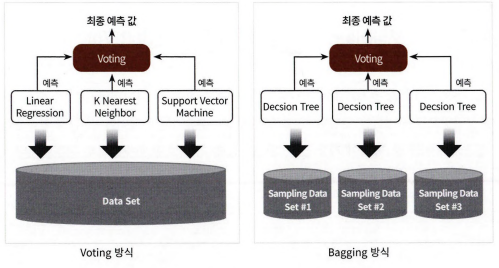

왼쪽 그림: 보팅 분류기 도식화
- : 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과 선정

오른쪽 그림: 배깅 분류기 도식화
- : 단일 ML 알고리즘(결정트리)으로 여러 분류기가 학습으로 개별 예측
- : 개별 Classifier에게 데이터 샘플링해서 추출하는 방식 = 부트스트래핑(Boostrapping)

**보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

- 하드 보팅: 예측한 결괏값들 중 다수 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 확률이 가장 높은 레이블 값 최종 보팅 결괏값으로 선정

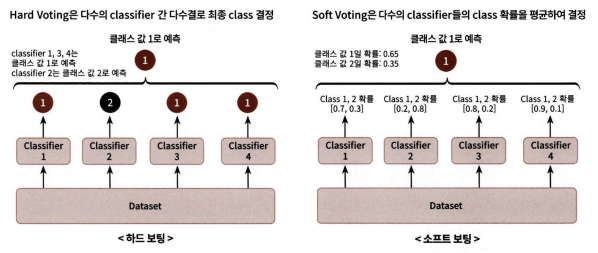

**보팅 분류기(Voting Classifier)**

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


- 로지스틱 회귀, KNN 기반 소프팅 보팅 방식으로 보팅 분류기 생성

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 앙상블 학습에서 결정 트리 알고리즘의 단점을 수많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 과적합 현상 극복
- 결정 트리 알고리즘 장점은 그대로 취하고 단점은 보완하면서 편향-분산 트레이드오프 효과 극대화

####04 랜덤 포레스트

**랜덤 포레스트의 개요 및 실습**

- 배깅(bagging)의 대표적인 알고리즘
- 개념: 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

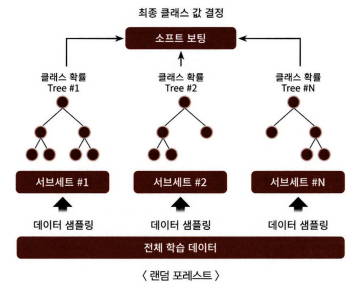

- 부트스트래핑(bootstrapping) 분할 방식: 여러 개의 데이터 세트를 중첩되게 분리하는 것
- 랜덤 포레스트의 서브세트 데이터는 부트스트래핑으로 데이터가 임의로 만들어짐 => 서브세트 데이터 건수는 전체 데이터 건수와 동일하지만 개별 데이터가 중첩되어 만들어짐

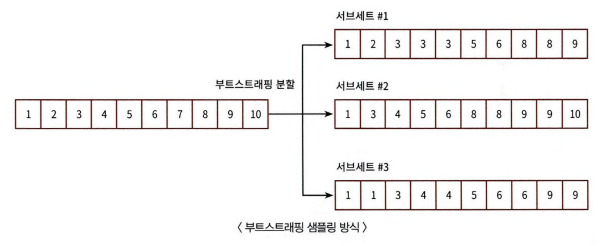

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/features.txt',sep='\s+',
                               header=None,names=['column_index','column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_dup_df = feature_name_df.groupby('column_name').count()

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                              'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                  if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
def get_human_dataset( ):

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/features.txt',sep='\s+',
                                  header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESAA/input/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-5-b93c33d6eeee>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
<ipython-input-5-b93c33d6eeee>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


**랜덤 포레스트 하이퍼 파라미터 및 튜닝**

트리 기반 앙상블 알고리즘 단점: 하이퍼 파라미터가 너무 많고 튜닝을 위한 시간이 많이 소모 => 튜닝 후 예측 성능이 크게 향상되는 경우 많이 없음

- n_estimators: 랜덤 포레스트에서 결정 트리 개수 지정 (디폴트 10개)
- max_features: 랜덤 포레스트의 트리를 분할하는 피처를 참고할 때 전체 피처가 아닌 sqrt(전체 피처 개수)만큼 참조
- max_depth, min_samples_split, min_samples_leat ... 결정 트리 과적합 개선 파라미터 똑같이 랜덤 포레스트에도 적용

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSerachCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


- 별도의 테스트 데이터 세트 수행 예측

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9260


- RandomForestClassifier의 feature_importances_ 속성으로 피처의 중요도 막대그래프 시각화

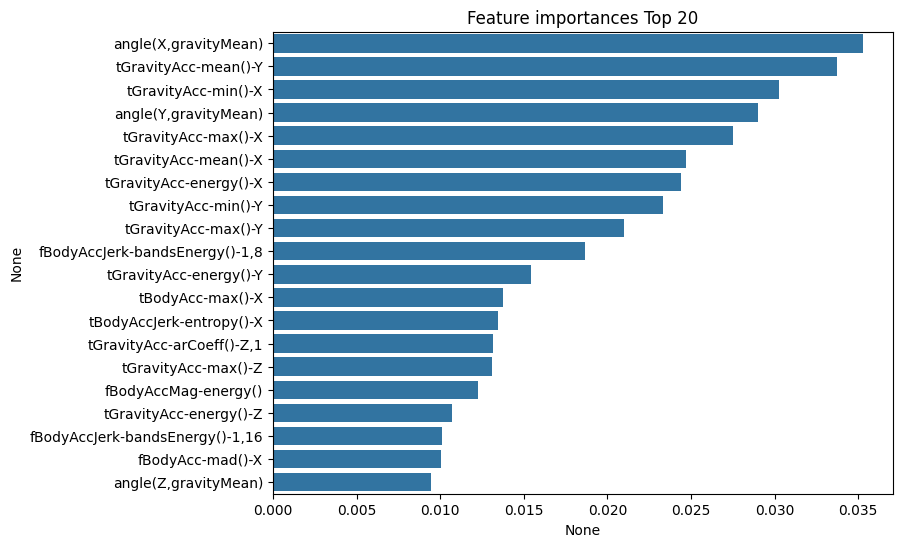

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

####05 GBM(Gradient Boosting Machine)

**GBM의 개요 및 실습**

- 에이다 부스트(AdaBoost): 데이터 가중치를 부여하면서 부스팅 수행하는 대표적인 알고리즘

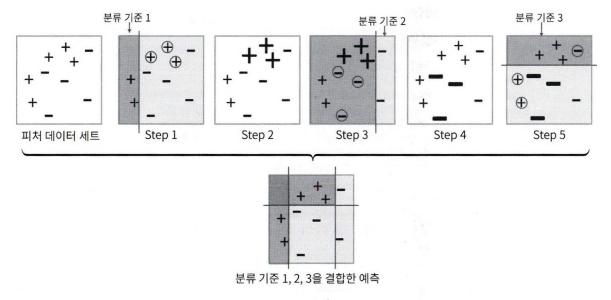



- Step 1: 분류 기준 1로 + - 분류, 동그라미 표시 데이터 -> + 오류 데이터
- Step 2: + 오류 데이터 가중치 값 부여
- Step 3: 분류 기준 2로 + - 분류. 동그라미 표시 데이터 -> - 오류 데이터
- Step 4: - 오류 데이터 더 큰 가중치 값 부여
- Step 5: 학습기가 순차적으로 오류 값 가중치 부여한 기준 결합해 예측 수행

GBM도 에이다부스트와 유사하지만 가중치 업데이틀 경사 하강법(Gradient Descent) 이용 - 경사 하강법: 오류식 h(x) = y - F(x)를 최소화하는 방향성으로 반복적으로 가중치 값을 업데이트 하는 것


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 1415.4 초 


- 일반적으로 GBM이 랜덤 포레스트보다 더 나은 예측 성능을 보임
- 수행 시간 오래 걸림 & 하이퍼 파라미터 튜닝 노력 더 필요함

**GBM 하이퍼 파라미터 소개**

- loss: 경사 하강법에서 사용할 비용 함수
- learning_rate: 학습 진행할때마다 적용하는 학습률
- n_estimators:weak learner의 개수
- subsample:weak learner가 학습에 사용하는 데이터 샘플링 비율

GBM은 과적합에도 뛰어난 예측 성능을 가졌지만 수행 시간이 매우 오래 걸림

####06 XGBoost(eXtra Gradient Boost)

**XGBoost 개요**

1. 뛰어난 예측 성능
2. GBM 대비 빠른 수행 시간
3. 과적합 규제(Regularization)
4. Tree pruning(나무 가지치기)
5. 자체 내장된 교차 검증
6. 결손값 자체 처리

**XGBoost 설치하기**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

**파이썬 래퍼 XGBoost 하이퍼 파라미터**

*일반 파라미터* : 실행 시 스레드의 개수나 silent 모드 선택을 위한 파라미터
- booster: gbtree 또는 gblinear 선택
- silent: 디폴트 0, 출력 메시지 나타내고 싶지 않을 경우 1로 설정
- nthread: CPU의 실행 스레드 개수 조정, 디폴트는 CPU의 전체 스레드를 다 사용하는 것

*부스터 파라미터* : 트리 최적화, 부스팅, regularization 등과 관련 파라미터 지칭
- eta[default=0.3, alias: learning_rate]
- num_boost_rounds
- min_child_weight[default=1]
- gamma[default-0, alias:min_split_loss]
- max_depth[default=6]
- ...등등

*학습 태스크 파라미터* : 학습 수행 시 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터
- objective: 최솟값을 가져야 할 손실 함수를 정의
- binary: 이진 분류일 때 적용
- multi:softmax: 다중 분류일 때 적용
- multi:softprob: 개별 레이블 클래스의 해당되는 예측 확률 반환
- eval_metric: 검증 사용되는 함수 정의

과적합 문제가 심각하다면 적용할 수 있는 것
- eta 값 낮추기, num_round 또는 n_estimators 높이기
- max_depth값 낮추기
- min_child_weight 높이기
- gamma 값 높이기
- subsample, colsample_bytree 조정하기

In [1]:
pip install xgboost==1.5.0

In [2]:
import xgboost

print(xgboost.__version__)

1.5.0


**파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

종양의 다양한 피처에 따라 악성종양(malignant)인지 일반 양성종양(benign)인지 XGBoost 이용해 예측:

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


- 타깃 레이블 값 종류는 악성인 'malignant'가 0, 양성인 'benign'이 1 값으로 돼 있음

In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


- 추출: 80% 학습용, 20% 테스트용
- 80% 학습용을 90% 최종 학습용, 10% 검증용으로 분할

=> XGBoost가 제공하는 기능인 검증 성능 평가와 조기 중단 수행해보기 위해서

In [5]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


- XGBoost만의 전용 데이터 객체 DMatrix 사용
- DMatrix의 주요 입력 파라미터 data(피처 데이터 세트), label(분류 레이블 데이터 세트)

In [7]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr.values)
dval = xgb.DMatrix(data=X_val.values, label=y_val.values)
dtest = xgb.DMatrix(data=X_test.values, label=y_test.values)

In [8]:
params = {'max_depth':3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
          }
num_rounds = 400

- 학습 시 XGBoost는 수행 속도 개선을 위해 조기 중단 기능 제공 => 수행 성능을 개선하기 위해 더 이상 지표 개선이 없을 경우에 num_boost_round 횟수 채우지 않고 중간에 반복을 빠져 나올 수 있도록 하는 것
- 조기 중단 성능 평가를 위해 별도의 검증 데이터 세트 이용: train() 함수에 early_stopping_rounds 파라미터 입력하여 설정

In [9]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기합니다.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')]만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, \
                      early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

- train()으로 학습을 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소
- num_boost_round를 400회로 설정했음에도 400번 반복하지 않고 176번째 반복에서 완료했음
- 126번째 반복에서 logloss(eval-logloss) 값이 0.25587로 가장 낮음
- 이후 126번에서 176번까지 early_stopping_rounds로 지정된 50회 동안 logloss 값은 이보다 향상되지 않았기 때문에 더 이상 반복하지 않고 멈춤

In [10]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [12]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9937


내장된 plot_importance() 호출하여 API로 피처의 중요도를 막대그래프 형식으로 나타낼 수 있음

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

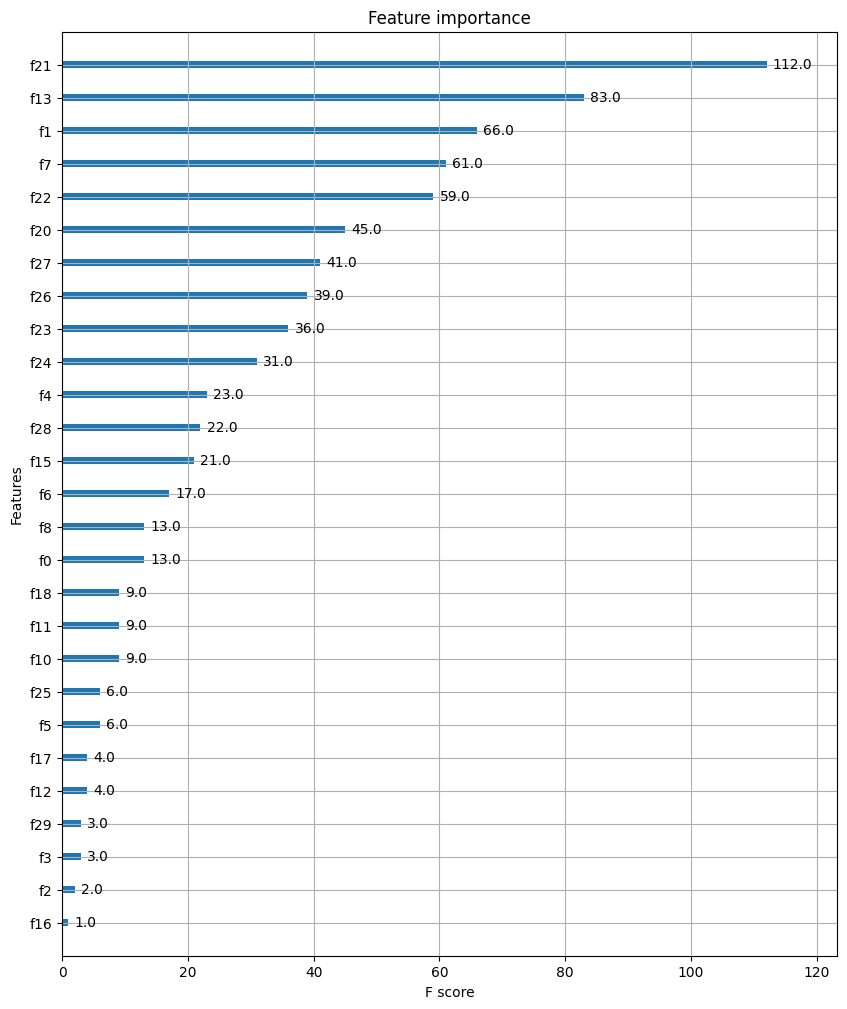

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

**사이킷런 래퍼 XGBoost의 개요 및 적용**

XGBClassifier: 분류를 위한 래퍼 클래스

XGBRegressor: 회귀를 위한 래퍼 클래스

- eta -> learning_rate
- sub_sample -> subsample
- lambda -> reg_lambda
- alpha -> reg_alpha

In [15]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train.values, y_train.values, verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [16]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC:0.9954


파이썬 래퍼 XGBoost보다 더 좋은 평가 결과가 나은 이유: 위스콘신 데이터 세트 개수가 워낙 작은데, 조기 중단을 위해서 최초 학습 데이터인 X_train을 다시 학습용 X_tr, X_val로 분리하면서 최종 학습 데이터 건수가 작아지기 때문에 발생한 것으로 추정

- 사이킷런 래퍼XGBoost에서 조기 중단 파라미터 fit()으로 수행

In [17]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr.values, y_tr.values), (X_val.values, y_val.values)]
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

- 파이썬 래퍼 조기 중단과 동일하게 176번째 반복에서 학습 마무리
- 검증 데이터 세트 성능 평가(validation_1-logloss) 0.25587로 가장 낮고, 이후 50번 반복까지 더 이상 성능 향상되지 않음

In [18]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9933


In [19]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

- 피처의 중요도 시각화 모듈 plot_importance() API에 사이킷런 래퍼 클래스 입려갷도 앞서 파이썬 래퍼 클래스 입력한 결과와 똑같이 시각화 결과 도출

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

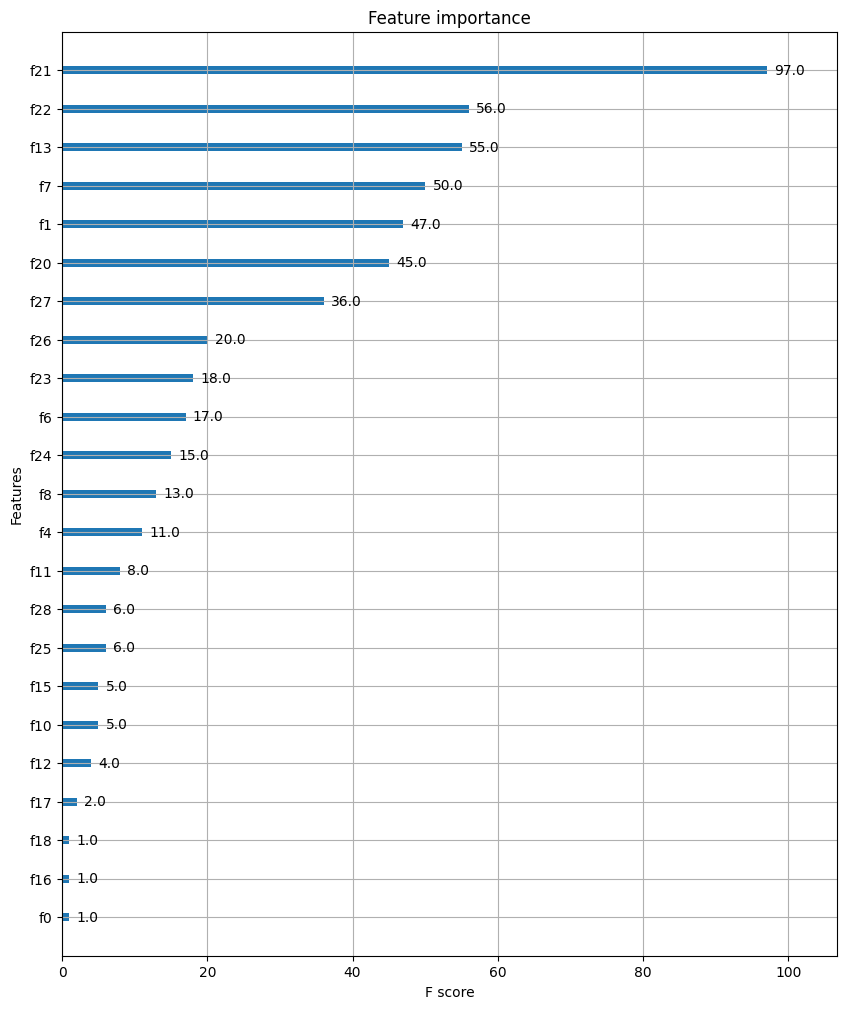

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)